## Notebook for plotting count per year

The code in the current notebook can be used to plot the **count** of a certain variable in the dataset per year. 

The queries that can be answered using an adapted version of the following code include but are not limited to:

* Show count of unique *clase* per *origin* per *year* in *forma* date range
* Show count of *produccion*  per *year* in *forma* date range
* Show count of unique *forma types*  per *year* in *forma* date range
* Show count of unique *forma types*  per *year*  per *site* in *forma* date range

### 1. Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
sns.set()
import pathlib
from pathlib import Path
import sys
sys.path.append("../src")
from matplotlib.ticker import FormatStrFormatter
from functions import preprocess, year_object_count_df, plot_graph, get_Y_range # module with all functions used for the task

### 2. Read in data

In [2]:
data = pd.read_excel('data/ATLANTICA_thesis_v0.2.xlsx')
data.head()

,id,site,contexto,clase,produccion,origin_h1,origin_h2,forma,forma_h2,total fragmentd,complete,rims,necks,handles,wall,bases,mni,tni,start_date,end_date
0,1,laias,1,anfora,betica guadalquivir,iberianpeninsula,betica guadalquivir,haltern 70?,maritime,19,NaN,NaN,NaN,NaN,19.0,NaN,5.0,5.0,-20.0,80.0
1,2,laias,1,vajilla fina,barniz negro italico,italy,unknown,unguentario?,NaN,3,NaN,NaN,NaN,NaN,3.0,NaN,2.0,2.0,-30.0,30.0
2,3,laias,1,vajilla fina,barniz negro italico,italy,unknown,indeterminada,NaN,1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,-30.0,30.0
3,4,laias,1,ceramica comun,betica,iberianpeninsula,betica,olla,roman inspired,1,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,50.0
4,5,laias,1,ceramica comun,betica,iberianpeninsula,betica,indeterminada,roman inspired,5,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,1.0,50.0


### 3. Prepare data

#### 3.1 Check in which columns numeric values are of an object type
#### 3.2 If found, convert objects into numeric values (float) 
This is essential for performing math operations with these variables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               432 non-null    int64  
 1   site             432 non-null    object 
 2   contexto         432 non-null    object 
 3   clase            432 non-null    object 
 4   produccion       432 non-null    object 
 5   origin_h1        432 non-null    object 
 6   origin_h2        432 non-null    object 
 7   forma            432 non-null    object 
 8   forma_h2         336 non-null    object 
 9   total fragmentd  432 non-null    int64  
 10  complete         29 non-null     float64
 11  rims             301 non-null    float64
 12  necks            32 non-null     float64
 13  handles          91 non-null     float64
 14  wall             234 non-null    float64
 15  bases            128 non-null    float64
 16  mni              430 non-null    float64
 17  tni             

#### 3.3 Clean text data (from punctuation, double spaces) and lowercase
This is done in order to avoid inconsistency in names and thus avoiding errors. 

In [3]:
cols_for_preprocessing = ['site', 'clase', 'produccion','origin_h1', 'origin_h2', 'forma','forma_h2']

for i in cols_for_preprocessing:
    data[i] = preprocess(data[i])

### 4. Create dataframes for plotting
To begin with the data is grouped according to the query. 

In the below code, the first line is what needs alteration to fit the query. The use is most easily described by an example. 

**Show count of unique *clase*  per *origin* per *year* in *forma* date range**: For this query the following syntax should be used. 
`df = data.groupby(['forma', 'start_date', 'end_date', 'origin_h1'])['clase'].apply(lambda x: ','.join(x))`


In [4]:
df0 = data.groupby(['forma', 'start_date', 'end_date', 'origin_h1'])['clase'].apply(lambda x: ','.join(x))
df0 = df0.apply(lambda x: x.split(','))
df0 = df0.reset_index()
df0 = df0.rename(columns = {'clase':'List_of_clase'})
df0.head()

,forma,start_date,end_date,origin_h1,List_of_clase
0,anfora de fondo plano,20.0,150.0,iberianpeninsula,"[anfora, anfora , anfora, anfora, anfora, anfo..."
1,anfora de fondo plano,20.0,150.0,unknown,[anfora]
2,barrenho,-20.0,100.0,iberianpeninsula,"[ceramica comun, ceramica comun, ceramica comu..."
3,botella,30.0,200.0,iberianpeninsula,"[ceramica comun, ceramica comun]"
4,brac. 24/25,100.0,200.0,iberianpeninsula,[vajilla fina]


### 5. Create a dataframe for each level of the variable
This needs to be done for all the levels of the variable, which should be included in the final plot. 

If for example, the goal is to plot three different origins, then three different count data frames should be made. 

In the following code, once again, it is only the first line that needs alteration.

`count_df = year_object_count_df(df[df[' '] == ' ']`



In [5]:
count_gaul = year_object_count_df(data = df0[df0['origin_h1'] == 'gaul'],
                                  lower_date = 'start_date',  
                                  upper_date = 'end_date',
                                  object_list = 'List_of_clase')  

In [6]:
count_italy = year_object_count_df(data = df0[df0['origin_h1'] == 'italy'], 
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_clase')  

In [7]:
count_unknown = year_object_count_df(data = df0[df0['origin_h1'] == 'unknown'], 
                                    lower_date = 'start_date',  
                                    upper_date = 'end_date',
                                    object_list = 'List_of_clase') 

### 6. Plot the graphs

#### 6.1. Create a dictionary for plotting
Now a dictionary containing the above dataframes is made. The keys (what is incapsulated in '') are going to be the labels for the plot. The variables refered to, are the dataframes created just above. 

In [8]:
df_dictionary = {'Gaul': count_gaul, 'Italy': count_italy}

In [9]:
df_dictionary2 = {'Gaul': count_gaul, 'Unknown': count_unknown}

#### 6.2 Plot and save
Here the data from the previously created count data frames are plotted. 

This is done using the function `plotgraph()`. 

To change the colour of lines, pass a list of strings with colour names to `palette` argument. 

To change the default `'solid'` line, pass f.ex., `'dashed'` to `linestyle` argument.o not show 

To hide values on axis uncomment `ax.axes.xaxis.set_ticks([])` for X and `ax.axes.yaxis.set_ticks([])` for Y.

To plot a single line graph specify only 1 axes in this line `fig, ax = plt.subplots(figsize=(20, 11))` and use this `ax` variable as an input for `ax` argument in `plotgraph()`. 
To plot 2 and more graphs side by side:
1. specify that many axes as graphs and the respective number of rows/columns of the subplot grid. F.ex., to plot 2 lie=ne graphs `fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 11))`
2. call `plot_graph()` on each `dictionary` and use the respective `ax` variable as an input for `ax` argument in `plotgraph()`.  
F.ex., in `plot_graph(dicts_of_df = df_dictionary, palette=['red', 'yellow'], linestyle = 'dashed', ax = ax1)` the line graph for dic with Gaul and Italy will be refered as `ax1` and placed on the **right** side of the graph.

**Note**: Remember to set labels, background colour, etc for both axes like in the example below.

/tmp/ipykernel_21146/2388434301.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


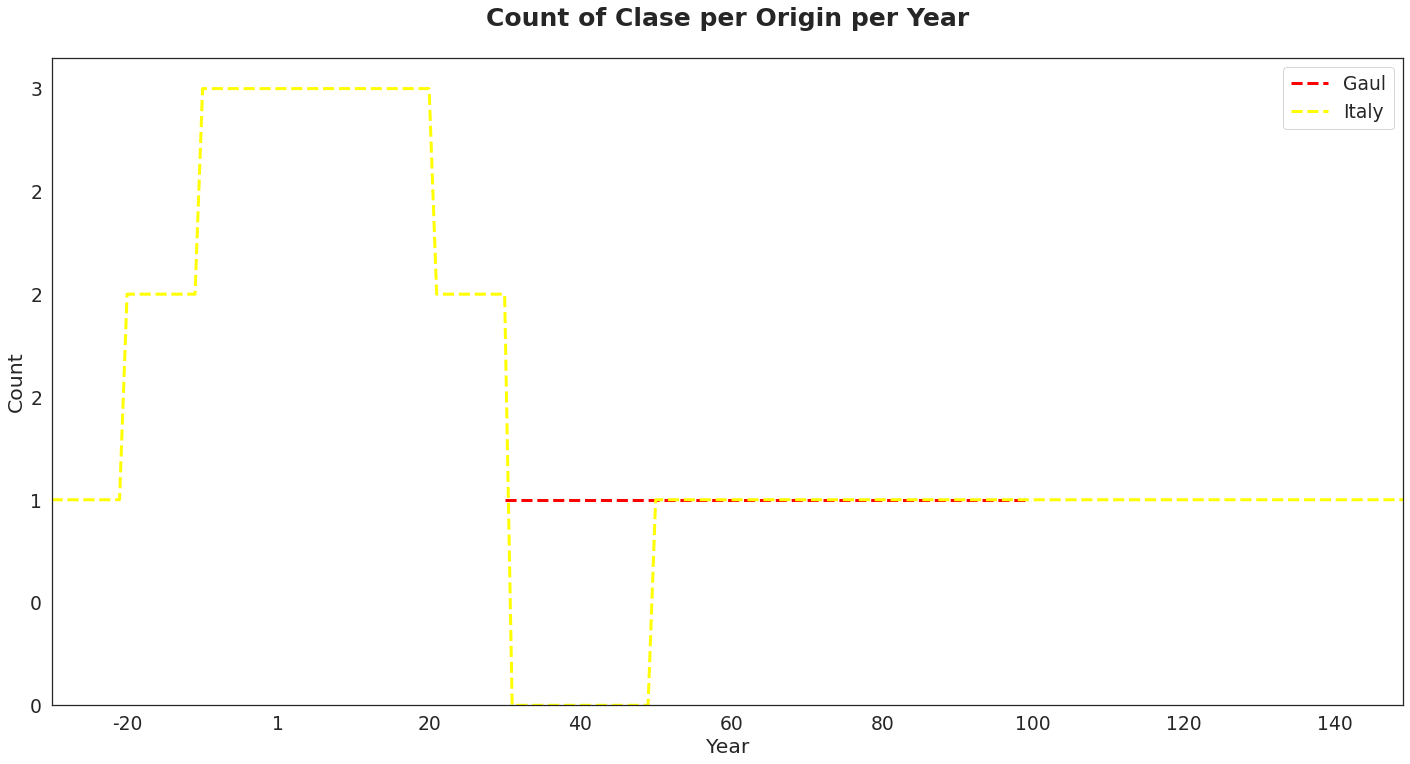

In [17]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['red', 'yellow'],  
           linestyle = 'dashed',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Count of Clase per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./fig.pdf')

/tmp/ipykernel_21146/1456840372.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
/tmp/ipykernel_21146/1456840372.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


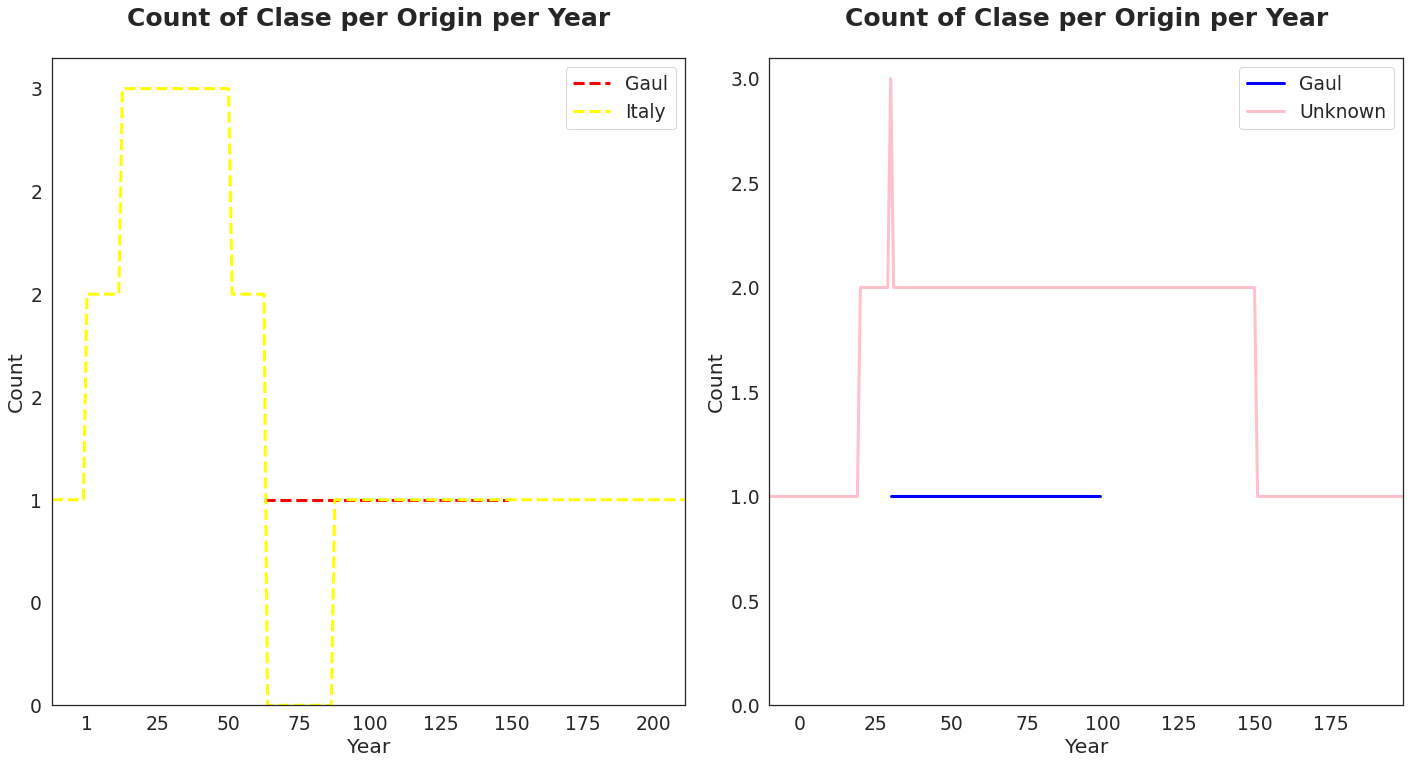

In [11]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

#Calculate minimum and maximum Y values 
minimum1, maximum1 = get_Y_range(df_dictionary)
minimum2, maximum2 = get_Y_range(df_dictionary2)

plot_graph(dicts_of_df = df_dictionary,
           palette=['red', 'yellow', 'green'],
           linestyle = 'dashed',
           ax = ax1)
           

plot_graph(dicts_of_df = df_dictionary2,
            palette=['blue', 'pink'],
            linestyle = 'solid',
            ax = ax2)

# Cut off the range of Y value shown 
ax1.set_xlim(minimum1, maximum1)
ax2.set_xlim(minimum2, maximum2)

# Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)

#Change background colour
ax1.set_facecolor("white")  
ax2.set_facecolor("white")

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Count")
ax1.set_xlabel("Year")

ax2.set_xlabel("Year")
ax2.set_ylabel("Count")


#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])


# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
ax1.set_title(label = 'Count of Clase per Origin per Year', size=25, y=1.04, fontweight='bold')

ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])
ax2.set_title(label = 'Count of Clase per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./fig1.pdf')